Processing banh-can:   0%|          | 0/363 [00:00<?, ?it/s]

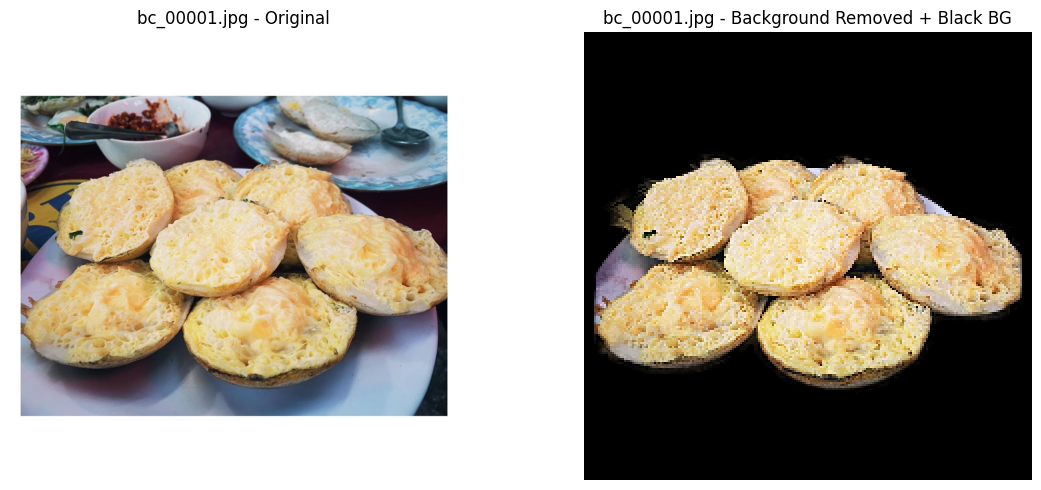

Processing banh-can:   0%|          | 1/363 [00:01<07:01,  1.16s/it]

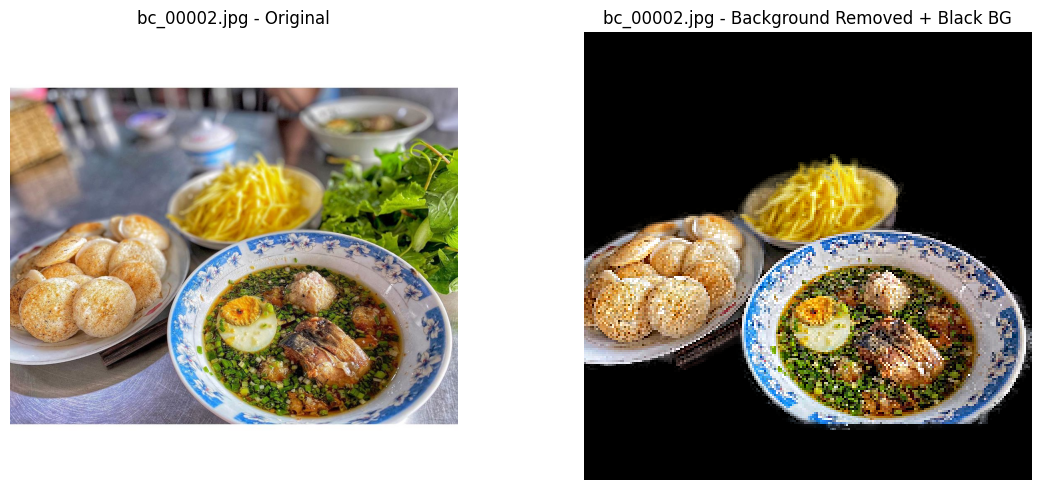

Processing banh-can:   1%|          | 2/363 [00:03<09:12,  1.53s/it]


KeyboardInterrupt: 

In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from rembg import remove

data_dir = r'/kaggle/input/vinafood21/VinaFood21/train'
preprocessed_dir = r'/kaggle/working/VinaFood21_Preprocessed/train'
os.makedirs(preprocessed_dir, exist_ok=True)

def preprocess_image(img, alpha_fore=10, alpha_back=3, erode_size=5, alpha_matting=True):
    """Tiền xử lý ảnh: Resize, Sharpen, CLAHE, Remove Background"""
    # 1️⃣ Resize
    img = cv.resize(img, (224, 224))
    
    # 2️⃣ Sharpen ảnh (Unsharp Masking)
    blur = cv.GaussianBlur(img, (5,5), 0)
    sharp_img = cv.addWeighted(img, 1.5, blur, -0.5, 0)
    
    # 3️⃣ CLAHE tăng tương phản cục bộ
    lab = cv.cvtColor(sharp_img, cv.COLOR_RGB2LAB)
    l, a, b = cv.split(lab)
    clahe = cv.createCLAHE(clipLimit=0.5, tileGridSize=(8,8))
    l = clahe.apply(l)
    lab = cv.merge((l, a, b))
    enhanced_img = cv.cvtColor(lab, cv.COLOR_LAB2RGB)
    
    # 4️⃣ Remove background
    rgba_img = remove(
        enhanced_img,
        alpha_matting=alpha_matting,
        alpha_matting_foreground_threshold=alpha_fore,
        alpha_matting_background_threshold=alpha_back,
        alpha_matting_erode_size=erode_size
    )

    # 5️⃣ Chuyển nền đen và lưu RGB
    if rgba_img.shape[-1] == 4:  # Có alpha channel
        rgb_img = rgba_img[..., :3]
        alpha = rgba_img[..., 3:] / 255.0
        # Tạo nền đen
        black_bg = np.zeros_like(rgb_img, dtype=np.uint8)
        rgb_on_black = (rgb_img * alpha + black_bg * (1 - alpha)).astype(np.uint8)
    else:
        rgb_on_black = rgba_img  # Trường hợp không có alpha

    return rgb_on_black


def process_folder(data_folder, save_folder, show_images=True):
    """Duyệt từng folder và file, xử lý và lưu"""
    os.makedirs(save_folder, exist_ok=True)
    
    for folder_name in sorted(os.listdir(data_folder)):
        folder_path = os.path.join(data_folder, folder_name)
        if not os.path.isdir(folder_path):
            continue
        
        target_folder = os.path.join(save_folder, folder_name)
        os.makedirs(target_folder, exist_ok=True)
        
        for filename in tqdm(sorted(os.listdir(folder_path)), desc=f"Processing {folder_name}"):
            if not filename.lower().endswith(('.jpg')):
                continue
            
            img_path = os.path.join(folder_path, filename)
            save_path = os.path.join(target_folder, os.path.splitext(filename)[0] + '.jpg')
            
            # Load ảnh
            img = cv.imread(img_path)
            rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            
            # Tiền xử lý
            processed_img = preprocess_image(rgb_img)
            
            # Lưu ảnh (RGB, nền đen)
            plt.imsave(save_path, processed_img)
            
            # Hiển thị (tùy chọn)
            if show_images:
                plt.figure(figsize=(12,5))
                plt.subplot(1,2,1)
                plt.imshow(rgb_img)
                plt.title(f"{filename} - Original")
                plt.axis('off')
                
                plt.subplot(1,2,2)
                plt.imshow(processed_img)
                plt.title(f"{filename} - Background Removed + Black BG")
                plt.axis('off')
                
                plt.tight_layout()
                plt.show()

# Chạy tiền xử lý
process_folder(data_dir, preprocessed_dir, show_images=True)


In [ ]:
# img = cv.imread(path)


In [ ]:
# # OpenCV đọc ảnh theo định dạng BGR (Blue-Green-Red).
# # Matplotlib hiển thị ảnh theo định dạng RGB (Red-Green-Blue).
# # Cần chuyển đổi định dạng này trước khi hiển thị.
# img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# img_rgb = cv.resize(img_rgb, (224, 224))  # Thay đổi kích thước ảnh nếu cần
# # Hiển thị ảnh bằng Matplotlib
# plt.imshow(img_rgb)
# plt.title("Image") # Thêm tiêu đề (tùy chọn)
# plt.axis('off')    # Tắt trục tọa độ (tùy chọn)
# plt.show()